(395, 25)
   age  Pstatus  Medu  Fedu  traveltime  studytime  failures  schoolsup  \
0   18        0     4     4           2          2         0          1   
1   17        1     1     1           1          2         0          0   
2   15        1     1     1           1          2         3          1   
3   15        1     4     2           1          3         0          0   
4   16        1     3     3           1          2         0          0   

   famsup  paid  ...  freetime  goout  Dalc  Walc  health  absences  G1  G2  \
0       0     0  ...         3      4     1     1       3         6   5   6   
1       1     0  ...         3      3     1     1       3         4   5   5   
2       0     1  ...         3      2     2     3       3        10   7   8   
3       1     1  ...         2      2     1     1       5         2  15  14   
4       1     1  ...         3      2     1     2       5         4   6  10   

   G3  average  
0   6      6.0  
1   6      5.0  
2  10      8.

[1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0
 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
m = 395
n = 154
Learning Rate = 0.0035
Num

C:\Users\Shravan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Shravan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo

Epoch 100 Cost: 124.02693176269531
Epoch 200 Cost: 123.88497924804688
Epoch 300 Cost: 123.8368148803711
Epoch 400 Cost: 123.81246948242188

Accuracy: 100.0 %


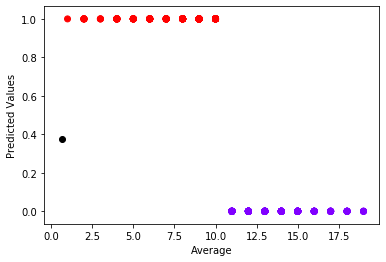

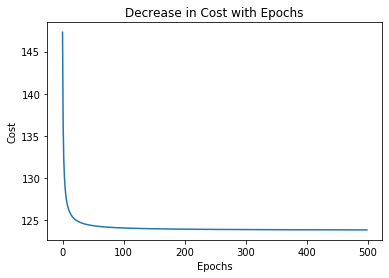

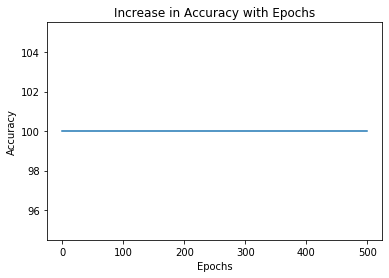

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import sklearn.metrics as metrics
import keras
#from tensorflow import tensorflow_estimator
from sklearn.cluster import KMeans
import keras
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
import random as rd
import matplotlib.pyplot as plt

students=pd.read_csv("student-mat.csv")
#print(students)
students['internet']= students.internet.map({'yes':1,'no':0})
students['activities']= students.activities.map({'yes':1,'no':0})
students['romantic']= students.romantic.map({'yes':1,'no':0})
students['famsup']= students.famsup.map({'yes':1,'no':0})
students['schoolsup']= students.schoolsup.map({'yes':1,'no':0})
students['Pstatus']= students.Pstatus.map({'T':1,'A':0})
students['paid']= students.paid.map({'yes':1,'no':0})
students['nursery']= students.nursery.map({'yes':1,'no':0})
students.drop(['school','sex','address','famsize','Mjob','Fjob','reason','guardian','higher'],axis=1,inplace=True)
#print(students['internet'])
students['average']=np.around((students['G1']+students['G2']+students['G3'])/3)
#students['percentage']=(students['average']/20)*100
#students["average"].to_csv('student-mat.csv',mode='a',header=False)


#for i in range(0,len(students['average'])):
 #   if(np.greater_equal(students['average'][i],7.0)):
  #      students.at[i,'remark']=1
  #  else:
   #     students.at[i,'remark']=0

#students_data  = students
#students.drop(['remark'],axis=1,inplace=True)
print(students.shape) 
print(students.head())
#rint(students.values.tolist())
#X = students['remark'].values
Y = students['average']
Z = students['Pstatus'].values
A = students['traveltime'].values/5
B = students['studytime'].values/5
C = students['failures'].values/3
D = students['schoolsup'].values
E = students['famsup'].values
F = students['paid'].values
G = students['activities'].values
H = students['internet'].values
I = students['romantic'].values
J = students['freetime'].values/5
K = students['goout'].values/5
L = students['Dalc'].values/5
M = students['Walc'].values/5
N = students['health'].values/5
O = students['absences'].values/93
#print(X)
#print(Y)
#print(Z)
#print(A)

num_clusters = 2

x = Y.values.reshape((Y.values.shape[0], -1))
x = np.divide(x, 20.)
#a = A.values.reshape((A.values.shape[0], -1))
#a = np.divide(a, 5.)

# 10 clusters
#print(x)
#print(a)
params=[Z,A,B,C,F,G,H,I,J,K,L,M,N,O]
x_orig = students.iloc[:, 1:-1].values 
print(x_orig)
#b = (x,A,Z)
print(params)
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=num_clusters, n_init=10, n_jobs=4)
#print(kmeans.cluster_centers_[0])
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x,params)
print(y_pred_kmeans)

n=len(params)
#print(n)
# Evaluate the K-Means clustering accuracy.
oneHot = OneHotEncoder() 

x_orig=students.iloc[:, 1:-1].values
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
print(x)
  
# Encoding y_orig 
y_orig=(students.iloc[:,-1:].values)/20
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
#y.reshape(1,-1)
alpha, epochs = 0.0035, 500
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 
#metrics.balanced_accuracy_score(X,y_pred_kmeans)
X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None,1]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 1])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([1])) 

# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 

# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
					logits = Y_hat, labels = Y) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
		learning_rate = alpha).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 

# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Lists for storing the changing Cost and Accuracy in every Epoch 
	cost_history, accuracy_history = [], [] 
	
	# Iterating through all the epochs 
	for epoch in range(epochs): 
		cost_per_epoch = 0
		
		# Running the Optimizer 
		sess.run(optimizer, feed_dict = {X : x, Y : y}) 
		
		# Calculating cost on current Epoch 
		c = sess.run(cost, feed_dict = {X : x, Y : y}) 
		
		# Calculating accuracy on current Epoch 
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
										tf.argmax(Y, 1)) 
		accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
												tf.float32)) 
		
		# Storing Cost and Accuracy to the history 
		cost_history.append(sum(sum(c))) 
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
		
		# Displaying result on current Epoch 
		if epoch % 100 == 0 and epoch != 0: 
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1])) 
	
	Weight = sess.run(W) # Optimized Weight 
	Bias = sess.run(b) # Optimized Bias 
	
	# Final Accuracy 
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
									tf.argmax(Y, 1)) 
	accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
											tf.float32)) 
	print("\nAccuracy:", accuracy_history[-1], "%") 

#X1=students['age'].value.reshape(-1,1)
#print(Y1)\
#1= np.numarray(students['age'].values.reshape(-1,1))
#1=params
#earning_rate =0.01
#raining_epochs=1000
# = tf.placeholder(tf.float32, [None, params], name="X")
# = tf.placeholder(tf.float32, [None, 1], name="Y")
#=tf.Variable(0.0,name="weights")
#=tf.Variable(0.0,name="bias")
#rint(students.data)
#decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
 #                              np.max(x_orig[:, 0])]) 
  
#decision_boundary_y = (- 1.0 / W[0]) * (decision_boundary_x * W + b) 
  
#decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                     #  sum(decision_boundary_y[:, 1])] 

plt.scatter(students['average'],y_pred_kmeans,c=kmeans.labels_, cmap='rainbow')
#plt.plot(decision_boundary_x, decision_boundary_y) 

#centers = np.array(kmeans_model.cluster_centers_)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(kmeans.cluster_centers_[0] ,kmeans.cluster_centers_[1], color='black')
plt.ylabel('Predicted Values')
plt.xlabel('Average')
plt.show()
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 

plt.show() 
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 

plt.show() 


In [40]:
students.isnull().any()

age           False
Pstatus       False
Medu          False
Fedu          False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
average       False
remark        False
dtype: bool

In [41]:
params

[array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [95]:
E

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

array([[ 6.],
       [ 5.],
       [ 8.],
       [15.],
       [ 9.],
       [15.],
       [12.],
       [ 6.],
       [18.],
       [15.],
       [ 9.],
       [11.],
       [14.],
       [10.],
       [15.],
       [14.],
       [14.],
       [ 9.],
       [ 5.],
       [ 9.],
       [14.],
       [14.],
       [15.],
       [13.],
       [ 9.],
       [ 8.],
       [12.],
       [15.],
       [11.],
       [11.],
       [11.],
       [17.],
       [16.],
       [10.],
       [14.],
       [ 7.],
       [16.],
       [15.],
       [12.],
       [13.],
       [ 9.],
       [12.],
       [18.],
       [ 9.],
       [10.],
       [ 7.],
       [11.],
       [19.],
       [15.],
       [ 7.],
       [13.],
       [12.],
       [11.],
       [10.],
       [12.],
       [ 9.],
       [15.],
       [15.],
       [ 9.],
       [16.],
       [11.],
       [10.],
       [ 9.],
       [ 9.],
       [10.],
       [15.],
       [13.],
       [ 7.],
       [ 8.],
       [16.],
       [14.],
      

In [23]:

# Feature Matrix 
students.iloc[:, 1:-1].values

array([[ 0,  4,  4, ...,  5,  6,  6],
       [ 1,  1,  1, ...,  5,  5,  6],
       [ 1,  1,  1, ...,  7,  8, 10],
       ...,
       [ 1,  1,  1, ..., 10,  8,  7],
       [ 1,  3,  2, ..., 11, 12, 10],
       [ 1,  1,  1, ...,  8,  9,  9]], dtype=int64)

In [7]:
(students.iloc[:,-1:].values)/20

array([[0.3 ],
       [0.25],
       [0.4 ],
       [0.75],
       [0.45],
       [0.75],
       [0.6 ],
       [0.3 ],
       [0.9 ],
       [0.75],
       [0.45],
       [0.55],
       [0.7 ],
       [0.5 ],
       [0.75],
       [0.7 ],
       [0.7 ],
       [0.45],
       [0.25],
       [0.45],
       [0.7 ],
       [0.7 ],
       [0.75],
       [0.65],
       [0.45],
       [0.4 ],
       [0.6 ],
       [0.75],
       [0.55],
       [0.55],
       [0.55],
       [0.85],
       [0.8 ],
       [0.5 ],
       [0.7 ],
       [0.35],
       [0.8 ],
       [0.75],
       [0.6 ],
       [0.65],
       [0.45],
       [0.6 ],
       [0.9 ],
       [0.45],
       [0.5 ],
       [0.35],
       [0.55],
       [0.95],
       [0.75],
       [0.35],
       [0.65],
       [0.6 ],
       [0.55],
       [0.5 ],
       [0.6 ],
       [0.45],
       [0.75],
       [0.75],
       [0.45],
       [0.8 ],
       [0.55],
       [0.5 ],
       [0.45],
       [0.45],
       [0.5 ],
       [0.75],
       [0.